<a href="https://colab.research.google.com/github/DevMed22/slam-dunk-2/blob/soccer-analytics/soccer-analytics/statsbomb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsbombpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 152 kB 32.7 MB/s 
     |████████████████████████████████| 47 kB 3.7 MB/s 
     |████████████████████████████████| 127 kB 59.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [112]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from statsbombpy import sb 

## Competitions

In [3]:
com = sb.competitions()

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [18]:
com

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


In [15]:
com_name = com['competition_name']
com_id = com['competition_id']
season_name = com['season_name']
season_id = com['season_id']

com_dict = dict(zip(com_name,com_id))
season_dict = dict(zip(season_name,season_id))

In [44]:
com_dict['La Liga']

11

In [45]:
season_dict['2018/2019']

4

## Matches

In [69]:
sb.matches(competition_id=com_dict['La Liga'], season_id=season_dict['2018/2019']).head()

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,15998,2018-09-26,20:00:00.000,Spain - La Liga,2018/2019,Leganés,Barcelona,2,1,available,...,2021-06-13T16:17:31.694,6,Regular Season,Estadio Municipal de Butarque,Alberto Undiano Mallenco,Mauricio Pellegrino,Ernesto Valverde Tejedor,1.1.0,2,None
1,16029,2018-10-20,20:45:00.000,Spain - La Liga,2018/2019,Barcelona,Sevilla,4,2,available,...,2021-06-13T16:17:31.694,9,Regular Season,Spotify Camp Nou,NaN,Ernesto Valverde Tejedor,Pablo Javier Machín Díez,1.1.0,2,None
2,16073,2018-11-24,20:45:00.000,Spain - La Liga,2018/2019,Atlético Madrid,Barcelona,1,1,available,...,2021-06-13T16:17:31.694,13,Regular Season,Estádio Cívitas Metropolitano,Jesús Gil Manzano,Diego Pablo Simeone,Ernesto Valverde Tejedor,1.1.0,2,None
3,16086,2018-12-08,20:45:00.000,Spain - La Liga,2018/2019,Espanyol,Barcelona,0,4,available,...,2021-06-13T16:17:31.694,15,Regular Season,RCDE Stadium,NaN,Joan Francesc Ferrer Sicilia,Ernesto Valverde Tejedor,1.1.0,2,None
4,16190,2019-02-23,16:15:00.000,Spain - La Liga,2018/2019,Sevilla,Barcelona,2,4,available,...,2021-06-13T16:17:31.694,25,Regular Season,Estadio Ramón Sánchez Pizjuán,Antonio Miguel Mateu Lahoz,Pablo Javier Machín Díez,Ernesto Valverde Tejedor,1.1.0,2,None


In [50]:
x = sb.matches(competition_id=com_dict['La Liga'], season_id=season_dict['2018/2019'])

In [71]:
x.columns

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')

In [81]:
def matches_id(data):
  match_id=[]
  match_name=[]
  match_index=np.arange(0,len(data))
  for i in range(len(data)):
    match_id.append(data['match_id'][i])
    match_name.append(data['home_team'][i]+' vs '+data['away_team'][i]+' '+data['competition_stage'][i])
  match_dict_id = dict(zip(match_name,match_id))
  match_dict_index = dict(zip(match_name,match_index))
  return match_name,match_dict_index,match_dict_id


In [82]:
m_name,m_idx,m_dict_id = matches_id(x)

In [87]:
print(m_dict_id[m_name[5]])

16109


In [97]:
def match_data(data,match_index):
  home_team = data['home_team'][match_index]
  away_team = data['away_team'][match_index]
  home_score = data['home_score'][match_index]
  away_score = data['away_score'][match_index]
  stadium = data['stadium'][match_index]
  home_maneger = data['home_managers'][match_index]
  away_maneger = data['away_managers'][match_index]
  comp_stats = data['competition_stage'][match_index]
  return home_team,away_team,home_score,away_score,stadium,home_maneger,away_maneger,comp_stats

In [98]:
h,w,s1,s2,stad,h_m,a_m,c_s = match_data(x,m_idx[m_name[5]])

In [99]:
print(h,w,s1,s2,stad,h_m,a_m,c_s)

Barcelona Celta Vigo 2 0 Spotify Camp Nou Ernesto Valverde Tejedor José Miguel Azevedo Cardoso Regular Season


## Lineup

In [100]:
sb.lineups(match_id=m_dict_id[m_name[5]])[w]

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,3625,Sofiane Boufal,None,19,Morocco,[],"[{'position_id': 16, 'position': 'Left Midfiel..."
1,5217,Iago Aspas Juncal,Iago Aspas,10,Spain,"[{'time': '44:56', 'card_type': 'Yellow Card',...","[{'position_id': 22, 'position': 'Right Center..."
2,5516,Pione Sisto Ifolo Emirmija,Pione Sisto,11,Denmark,[],"[{'position_id': 12, 'position': 'Right Midfie..."
3,6297,Maximiliano Gómez González,Maxi Gómez,9,Uruguay,[],"[{'position_id': 24, 'position': 'Left Center ..."
4,6794,Gustavo Daniel Cabral Cáceres,Gustavo Cabral,22,Argentina,[],[]
5,6795,Rubén Blanco Veiga,Rubén Blanco,13,Spain,[],"[{'position_id': 1, 'position': 'Goalkeeper', ..."
6,6798,Stanislav Lobotka,None,14,Slovakia,[],"[{'position_id': 13, 'position': 'Right Center..."
7,6799,Brais Méndez Portela,Brais Méndez,23,Spain,[],"[{'position_id': 12, 'position': 'Right Midfie..."
8,6805,Hugo Mallo Novegil,Hugo Mallo,2,Spain,[],"[{'position_id': 2, 'position': 'Right Back', ..."
9,6852,Jozabed Sánchez Ruiz,Jozabed Sánchez,21,Spain,[],"[{'position_id': 15, 'position': 'Left Center ..."


## Events

In [115]:
events = sb.events(match_id=m_dict_id[m_name[5]], split=True, flatten_attrs=False)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [119]:
events['shots']

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,player,position,location,duration,related_events,shot,match_id,possession_team_id,player_id,under_pressure
0,02ff40cd-84f0-4221-b3af-b5e028ad1732,115,1,00:01:49.432,1,49,Shot,7,Celta Vigo,From Counter,...,Sofiane Boufal,Left Midfield,"[94.4, 29.1]",0.134246,"[700446f2-2332-4c0d-9ced-45fc7fa7babf, cdb7056...","{'statsbomb_xg': 0.01947273, 'end_location': [...",16109,209,3625,NaN
1,5603e0bb-b834-45a8-9ed9-4aa61695e255,122,1,00:02:23.161,2,23,Shot,8,Celta Vigo,From Corner,...,Néstor Alejandro Araújo Razo,Right Center Back,"[115.8, 36.7]",1.432204,[a7999054-ae16-4569-86fd-5d7bb489441d],"{'statsbomb_xg': 0.3083026, 'end_location': [1...",16109,209,11388,NaN
2,4a799465-be15-42a5-b865-d2193e0e7f5d,425,1,00:09:34.467,9,34,Shot,23,Barcelona,From Throw In,...,Lionel Andrés Messi Cuccittini,Right Wing,"[102.7, 36.6]",0.824476,[b444fd23-2a88-467b-a7ee-b5c5707bf021],"{'statsbomb_xg': 0.11766842, 'end_location': [...",16109,217,5503,NaN
3,7478547a-1fbe-4f03-a541-0633fabfa651,429,1,00:09:36.388,9,36,Shot,23,Barcelona,From Throw In,...,Ousmane Dembélé,Left Wing,"[112.7, 31.3]",0.698568,"[6b2150c7-70eb-48c2-ae64-c4cb9de2b27e, 9da2def...","{'statsbomb_xg': 0.36089253, 'end_location': [...",16109,217,5477,True
4,382aed9d-1f30-4cdb-9456-af27ed1d7e1a,891,1,00:20:39.651,20,39,Shot,43,Barcelona,Regular Play,...,Jordi Alba Ramos,Left Back,"[94.3, 49.2]",1.405451,"[0eec36f8-495a-4483-91de-ea64fd0f3611, a10bb53...","{'statsbomb_xg': 0.13638394, 'end_location': [...",16109,217,5211,NaN
5,b2cfcc9b-3b3e-42db-accc-1bedcb825a10,1005,1,00:23:54.401,23,54,Shot,47,Celta Vigo,Regular Play,...,Maximiliano Gómez González,Left Center Forward,"[101.3, 41.9]",0.826900,[59e0fd21-6cd3-4327-afa8-4c83de28b169],"{'statsbomb_xg': 0.039732218, 'end_location': ...",16109,209,6297,NaN
6,8e93287a-7dcf-4925-bcf4-b6804b84a473,1339,1,00:30:09.400,30,9,Shot,76,Barcelona,Regular Play,...,Luis Alberto Suárez Díaz,Center Forward,"[101.4, 47.3]",1.809000,[9ac26220-20c9-4083-b986-0a1599752b72],"{'statsbomb_xg': 0.041823935, 'end_location': ...",16109,217,5246,NaN
7,7f41e48b-28a4-4754-98a5-24e1350b0aa8,1667,1,00:39:30.461,39,30,Shot,90,Celta Vigo,From Free Kick,...,Hugo Mallo Novegil,Right Back,"[110.7, 55.1]",1.071444,[468910e3-d96e-4256-99b7-8f29cfd523cc],"{'statsbomb_xg': 0.036361493, 'end_location': ...",16109,209,6805,NaN
8,94be21c6-76e8-4788-921b-d2f4805fe4d2,1920,1,00:44:33.913,44,33,Shot,100,Barcelona,From Free Kick,...,Lionel Andrés Messi Cuccittini,Right Wing,"[101.7, 35.7]",0.950700,[db703b2e-142d-4818-a85f-eeb57ad2d172],"{'statsbomb_xg': 0.23396829, 'end_location': [...",16109,217,5503,NaN
9,cd0be756-73ac-4556-a133-8ff7a0cfeb65,2484,2,00:10:12.281,55,12,Shot,129,Celta Vigo,From Free Kick,...,Brais Méndez Portela,Right Midfield,"[99.1, 46.0]",1.825618,[1a0ee487-4dd0-4498-bdd8-9fba2a03e0af],"{'statsbomb_xg': 0.060534257, 'end_location': ...",16109,209,6799,NaN


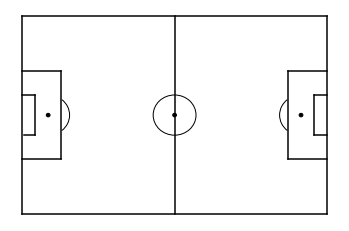

In [113]:
def createPitch():
    
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="black")
    plt.plot([0,130],[90,90], color="black")
    plt.plot([130,130],[90,0], color="black")
    plt.plot([130,0],[0,0], color="black")
    plt.plot([65,65],[0,90], color="black")
    
    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color="black")
    plt.plot([0,16.5],[65,65],color="black")
    plt.plot([16.5,0],[25,25],color="black")
    
    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color="black")
    plt.plot([113.5,113.5],[65,25],color="black")
    plt.plot([113.5,130],[25,25],color="black")
    
    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color="black")
    plt.plot([5.5,5.5],[54,36],color="black")
    plt.plot([5.5,0.5],[36,36],color="black")
    
    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color="black")
    plt.plot([124.5,124.5],[54,36],color="black")
    plt.plot([124.5,130],[36,36],color="black")
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
    centreSpot = plt.Circle((65,45),0.8,color="black")
    leftPenSpot = plt.Circle((11,45),0.8,color="black")
    rightPenSpot = plt.Circle((119,45),0.8,color="black")
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    plt.axis('off')
    
    #Display Pitch
    plt.show()
    
createPitch()

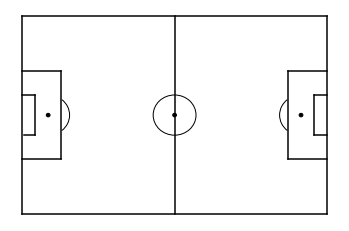

ValueError: ignored

In [123]:
#Draw the pitch
pitchLengthX=120
pitchWidthY=80

ax= createPitch()

#Plot the shots
for i,shot in events['shots'].iterrows():
    x=shot['location'][0]
    y=shot['location'][1]
    
    # goal=shot['shot_outcome_name']=='Goal'
    # team_name=shot['team_name']
    
    circleSize=2
    #circleSize=np.sqrt(shot['shot_statsbomb_xg'])*12

    if (events['shots']['possession_team']==h):
        # if goal:
        #     shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
        #     plt.text((x+1),pitchWidthY-y+1,shot['player_name']) 
        # else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    elif (events['shots']['possession_team']==w):
        # if goal:
        #     shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
        #     plt.text((pitchLengthX-x+1),y+1,shot['player_name']) 
        # else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    